# 서울시 구별 CCTV / 인구 분석

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_csv('서울시_CCTV_인구_병합데이터.csv')
df.set_index('구별', inplace=True)
df.head()

,CCTV댓수,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
종로구,1772,20.49,155106,9077,27605,5.85,17.80
중구,2333,78.98,132259,9243,23980,6.99,18.13
용산구,2383,78.64,240665,14287,38884,5.94,16.16
성동구,3602,46.13,295767,6605,45591,2.23,15.41
광진구,2588,112.29,355306,12825,50815,3.61,14.30


- 상관관계 분석

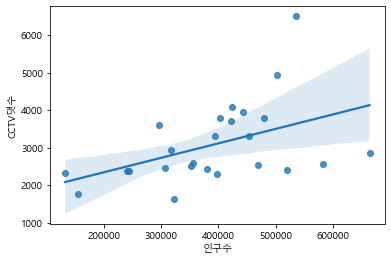

In [4]:
# CCTV 댓수 vs. 인구수, 외국인비율 고령자비율
sns.regplot(x='인구수', y='CCTV댓수', data=df)
plt.show()

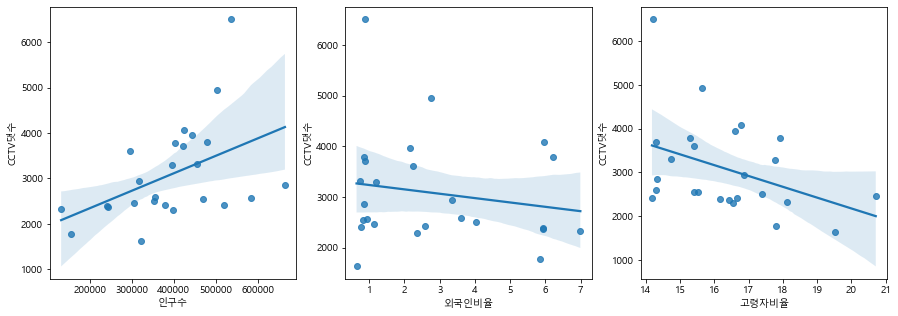

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
features = ['인구수', '외국인비율', '고령자비율']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i])
    

In [7]:
for i, feature in enumerate(features):
    print(i, feature)

0 인구수
1 외국인비율
2 고령자비율


- 구별 CCTV 댓수

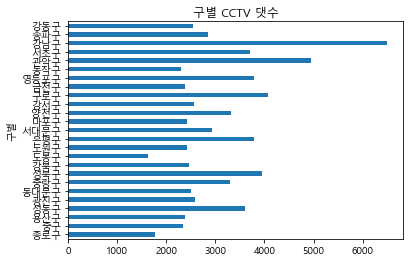

In [9]:
df.CCTV댓수.plot(kind='barh')
plt.title('구별 CCTV 댓수')
plt.show()

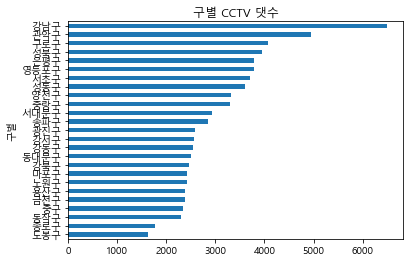

In [11]:
df.CCTV댓수.sort_values().plot(kind='barh') # 순서대로 하려면 sort_values() 넣어줘야함
plt.title('구별 CCTV 댓수')
plt.show()

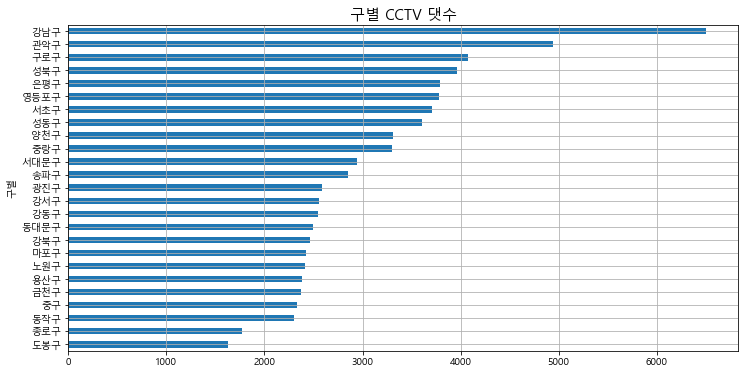

In [13]:
df.CCTV댓수.sort_values().plot(kind='barh', grid=True, figsize=(12,6)) # 모양 이쁘게 하기
plt.title('구별 CCTV 댓수', fontsize=15)
plt.show()

- 인구대비 CCTV 비율

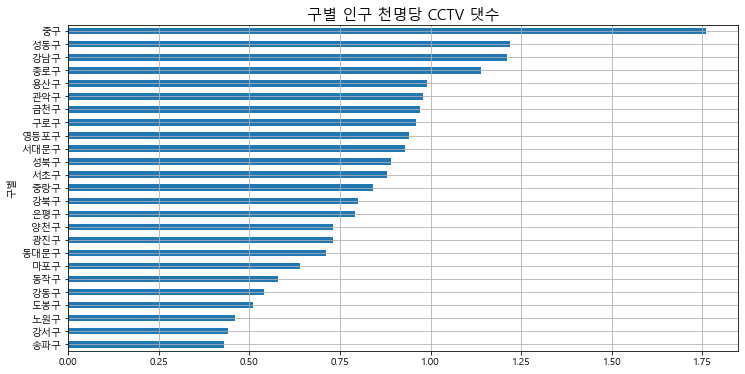

In [16]:
df['천명당CCTV'] = (df.CCTV댓수 / df.인구수 * 100).round(2)
df.천명당CCTV.sort_values().plot(kind='barh', grid=True, figsize=(12,6))
plt.title('구별 인구 천명당 CCTV 댓수', fontsize=15)
plt.show()

- 인구수와 CCTV 댓수 분석

- 산전도(Scatter plot)

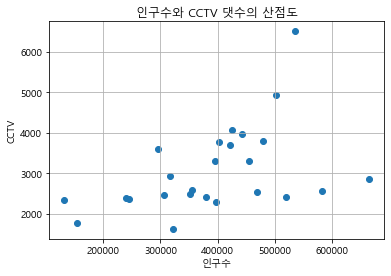

In [17]:
# 산전도(Scatter plot)
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.grid()
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 회귀선

In [20]:
weight, bias = np.polyfit(df.인구수, df.CCTV댓수, 1) # 앞에 있는 것이 가중치 뒤가 편향 
weight, bias

(0.0038511976508863724, 1572.3151359747483)

In [22]:
xs = np.array([100000, 700000])
ys = weight * xs + bias
ys

array([1957.43490106, 4268.1534916 ])

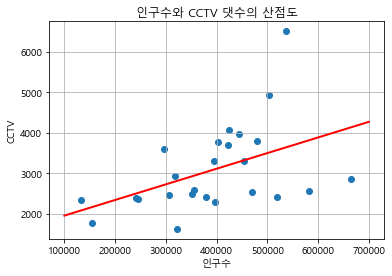

In [23]:
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.plot(xs, ys, 'r-', lw=2)
plt.grid()
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()